In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

import os 
import seaborn as sns
import datetime as dt

# Read first data

In [2]:
file_1 = os.path.join(os.getcwd(), "miles-driven.csv")

In [3]:
df_1 = pd.read_csv(file_1)
df_1.head()

,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784


# let's split our column

In [4]:
# df_1
df_1 = df_1["state|million_miles_annually"].str.split(pat='|',expand=True)

In [5]:
df_1.head()

,0,1
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


# change name of columns


In [6]:
df_1.rename(columns={0: 'state', 1: 'million_miles_annually'}, inplace=True)

In [7]:
df_1.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


# Read second data

In [8]:
#df_2
file_2 = os.path.join(os.getcwd(), "road-accidents.csv")

In [9]:
df_2 = pd.read_csv(file_2)
df_2.head(10)

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


In [10]:
another_data = df_2[0:9].values
another_data

array([['# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)'],
       ['# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)'],
       ['##### COLUMN ABBREVIATIONS #####'],
       ['# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)'],
       ['# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)'],
       ['# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)'],
       ['# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)'],
       ['##### DATA BEGIN #####'],
       ['state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time']],
      dtype=object)

# change name of columns


In [11]:
df_2.rename(columns={"##### LICENSE #####": 'state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'}, inplace=True)
df_2

,state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


# drop first 9 rows

In [12]:
df_2.index

RangeIndex(start=0, stop=60, step=1)

In [13]:
df_2.drop(axis = 0, index= df_2.index[:9], inplace= True)

In [14]:
df_2.reset_index(drop= True, inplace= True)

# let's split our column

In [15]:
df_2 = df_2["state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time"].str.split(pat='|',expand=True)


In [16]:
df_2.head(5)

,0,1,2,3,4
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12,35,28,89


In [17]:
df_2.rename(columns={0: 'state', 1: 'drvr_fatl_col_bmiles', 2:"perc_fatl_speed" , 3:"perc_fatl_alcohol" , 4:"perc_fatl_1st_time"}, inplace=True)

In [18]:
df_2.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12,35,28,89


In [19]:
df_total = pd.merge(df_1, df_2, on='state')
df_total.head()

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12,35,28,89


# Check Nulls

In [20]:
df_total.isna().sum()

state                     0
million_miles_annually    0
drvr_fatl_col_bmiles      0
perc_fatl_speed           0
perc_fatl_alcohol         0
perc_fatl_1st_time        0
dtype: int64

In [21]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     object
 2   drvr_fatl_col_bmiles    51 non-null     object
 3   perc_fatl_speed         51 non-null     object
 4   perc_fatl_alcohol       51 non-null     object
 5   perc_fatl_1st_time      51 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


# Change Dtypes

In [22]:
df_total = df_total.astype({'million_miles_annually': 'int64', 'drvr_fatl_col_bmiles': 'float64','perc_fatl_speed': 'int64', 'perc_fatl_alcohol': 'int64', 'perc_fatl_1st_time': 'int64'})

In [23]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   million_miles_annually  51 non-null     int64  
 2   drvr_fatl_col_bmiles    51 non-null     float64
 3   perc_fatl_speed         51 non-null     int64  
 4   perc_fatl_alcohol       51 non-null     int64  
 5   perc_fatl_1st_time      51 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.8+ KB


In [24]:
df_total.head(10)

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12.0,35,28,89
5,Colorado,46606,13.6,37,28,95
6,Connecticut,31197,10.8,46,36,82
7,Delaware,9028,16.2,38,30,99
8,District of Columbia,3568,5.9,34,27,100
9,Florida,191855,17.9,21,29,94


# Visualization

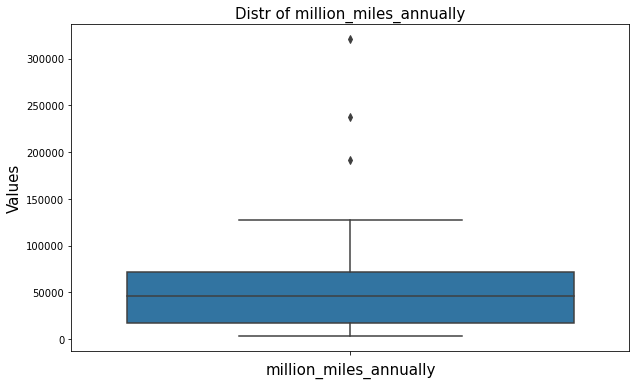

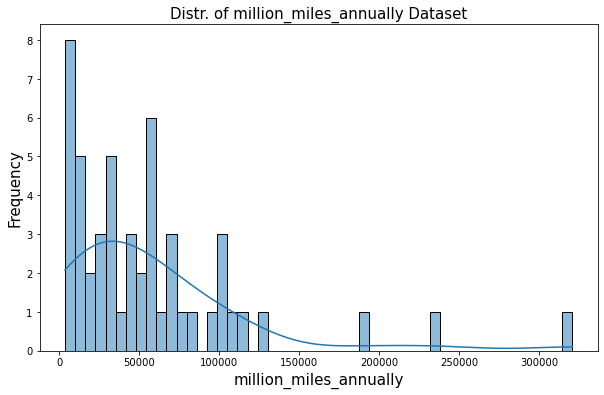

In [25]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='million_miles_annually', data=df_total)

## title and axis
plt.title('Distr of million_miles_annually', fontsize=15)
plt.xlabel('million_miles_annually', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.show()

## Let's make a Histogram
plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='million_miles_annually', data=df_total, bins=50, kde=True)

## title and axis
plt.title('Distr. of million_miles_annually Dataset', fontsize=15)
plt.xlabel('million_miles_annually', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


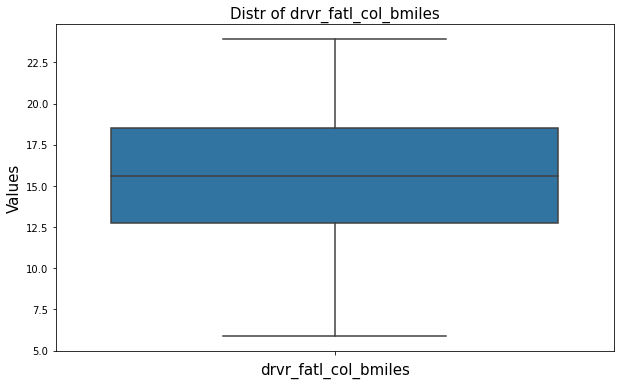

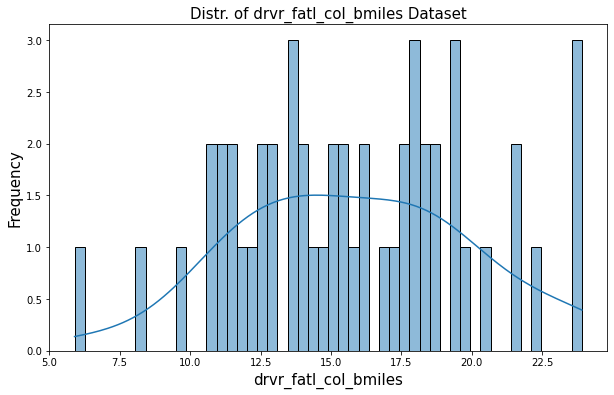

In [26]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='drvr_fatl_col_bmiles', data=df_total)

## title and axis
plt.title('Distr of drvr_fatl_col_bmiles', fontsize=15)
plt.xlabel('drvr_fatl_col_bmiles', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.show()


## Let's make a Histogram
plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='drvr_fatl_col_bmiles', data=df_total, bins=50, kde=True)

## title and axis
plt.title('Distr. of drvr_fatl_col_bmiles Dataset', fontsize=15)
plt.xlabel('drvr_fatl_col_bmiles', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


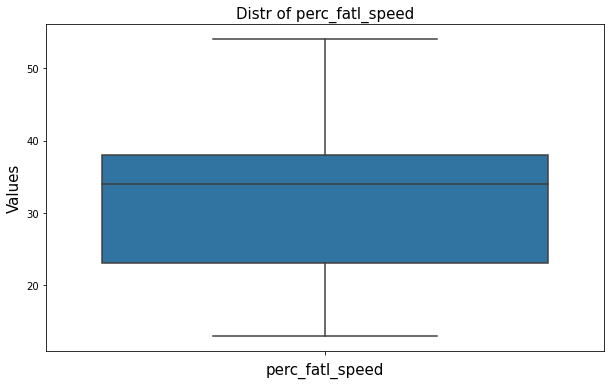

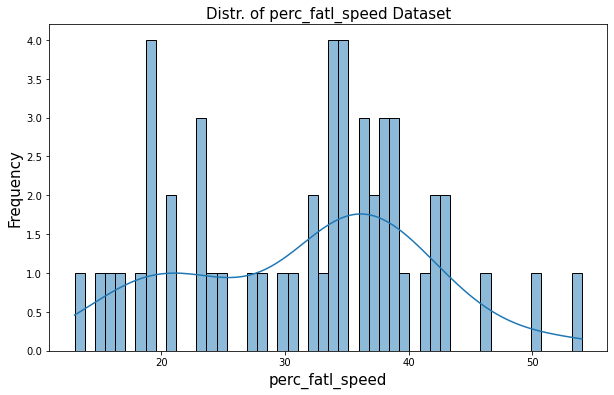

In [27]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='perc_fatl_speed', data=df_total)

## title and axis
plt.title('Distr of perc_fatl_speed', fontsize=15)
plt.xlabel('perc_fatl_speed', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.show()

## Let's make a Histogram
plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='perc_fatl_speed', data=df_total, bins=50, kde=True)

## title and axis
plt.title('Distr. of perc_fatl_speed Dataset', fontsize=15)
plt.xlabel('perc_fatl_speed', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

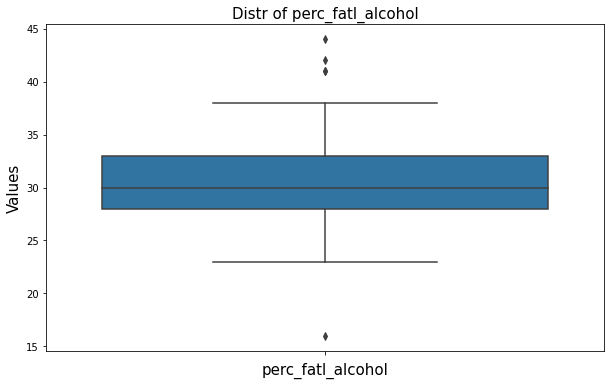

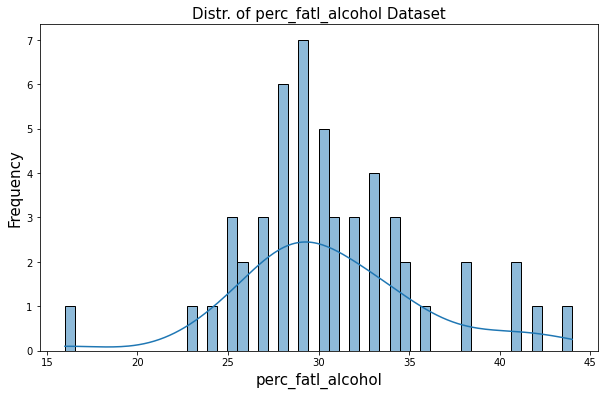

In [28]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='perc_fatl_alcohol', data=df_total)

## title and axis
plt.title('Distr of perc_fatl_alcohol', fontsize=15)
plt.xlabel('perc_fatl_alcohol', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.show()

## Let's make a Histogram
plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='perc_fatl_alcohol', data=df_total, bins=50, kde=True)

## title and axis
plt.title('Distr. of perc_fatl_alcohol Dataset', fontsize=15)
plt.xlabel('perc_fatl_alcohol', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

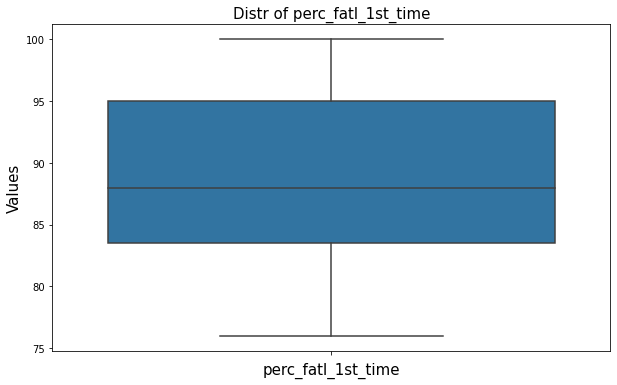

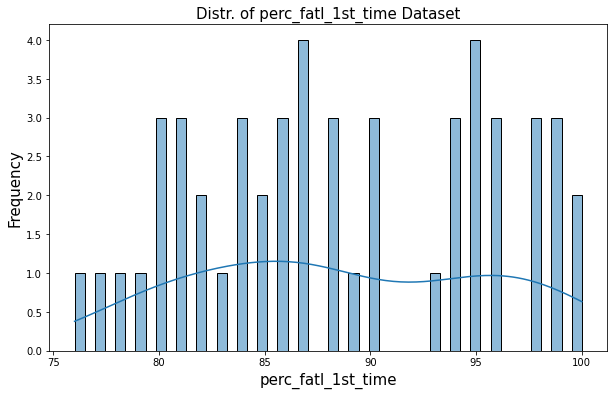

In [29]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='perc_fatl_1st_time', data=df_total)

## title and axis
plt.title('Distr of perc_fatl_1st_time', fontsize=15)
plt.xlabel('perc_fatl_1st_time', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.show()


## Let's make a Histogram
plt.figure(figsize=(10, 6))    ## figure shape

sns.histplot(x='perc_fatl_1st_time', data=df_total, bins=50, kde=True)

## title and axis
plt.title('Distr. of perc_fatl_1st_time Dataset', fontsize=15)
plt.xlabel('perc_fatl_1st_time', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [30]:
df_total.describe() #text summary

,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.000000,51.00000
mean,57851.019608,15.790196,31.725490,30.686275,88.72549
std,59898.414088,4.122002,9.633438,5.132213,6.96011
min,3568.000000,5.900000,13.000000,16.000000,76.00000
25%,17450.000000,12.750000,23.000000,28.000000,83.50000
50%,46606.000000,15.600000,34.000000,30.000000,88.00000
75%,71922.500000,18.500000,38.000000,33.000000,95.00000
max,320784.000000,23.900000,54.000000,44.000000,100.00000


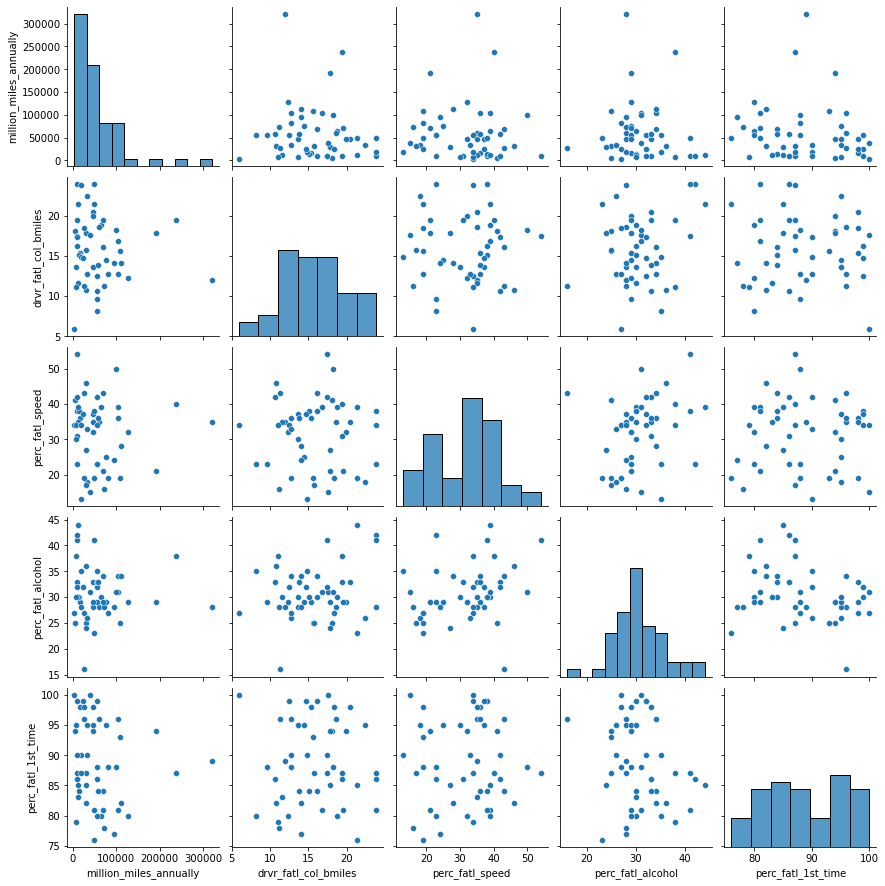

In [31]:
sns.pairplot(df_total) #diagram summary

In [32]:
df_total.corr()

,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
million_miles_annually,1.000000,-0.077133,-0.043199,-0.034561,-0.128928
drvr_fatl_col_bmiles,-0.077133,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.043199,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,-0.034561,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.128928,-0.017942,0.014066,-0.245455,1.000000


In [33]:
features = df_total.drop(['state','drvr_fatl_col_bmiles'], axis =1)
target =  df_total['drvr_fatl_col_bmiles']

In [34]:
linear_reg = LinearRegression()
linear_reg.fit(features, target)

LinearRegression()

In [35]:
coef = linear_reg.coef_
coef

array([-4.76649976e-06, -4.24831810e-02,  1.87339877e-01,  1.88197884e-02])

In [36]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

In [37]:
pca = PCA()
pca.fit(df_scaled)


############## i will ask about this step

PCA()

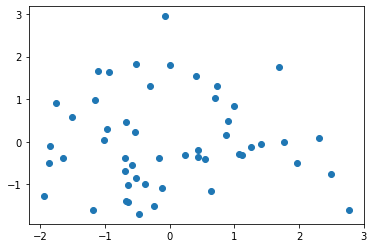

In [38]:
pca = PCA(n_components=2)
pca_comps = pca.fit_transform(df_scaled)

pca_comp1 = pca_comps[:,0]
pca_comp2 = pca_comps[:,1]

plt.scatter(pca_comp1,pca_comp2)
plt.show()

C:\Users\Eng.Mouradadel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


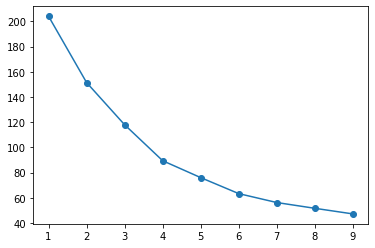

In [39]:
inertia = []
for k in range(1, 10):
    
    km = KMeans(n_clusters= k, random_state=8)

    km.fit(df_scaled)

    inertia.append(km.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.show()

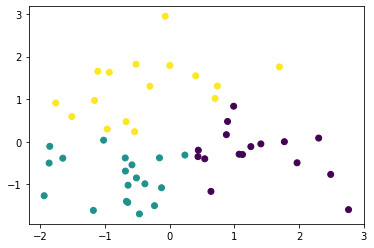

In [40]:
km = KMeans(n_clusters = 3, random_state=8)
km.fit(df_scaled)

plt.scatter(pca_comps[:, 0], pca_comps[:, 1], c=km.labels_)
plt.show()

In [41]:
# i will ask about this point

In [42]:
df_total['num_drvr_fatl_col'] = (df_total['drvr_fatl_col_bmiles']/1000)*df_total['million_miles_annually']
df_total.head()

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,num_drvr_fatl_col
0,Alabama,64914,18.8,39,30,80,1220.3832
1,Alaska,4593,18.1,41,25,94,83.1333
2,Arizona,59575,18.6,35,28,96,1108.0950
3,Arkansas,32953,22.4,18,26,95,738.1472
4,California,320784,12.0,35,28,89,3849.4080


In [43]:
# i will ask about this point